# Accessing and Subsetting Variables

## Objectives

Introduce methods for **accessing** and **subsetting** the variables stored in ECCO `Datasets` and `DataArrays`.


## Accessing fields inside `Dataset` and `DataArray` objects

There are two methods for accessing variables stored in `DataArray` and `Dataset` objects, the "dot" method and the "dictionary" method.  The syntax of these methods is as follows:

1. The "dot" method: e.g. ,`X.Y`
2. The "dictionary" method: e.g., `Y['Y']`

Both methods work identically to access *Dimensions*, *Coordinates*, and *Data variables*. Accessing *Attribute* variables requires a slightly different approach as we will see.

Before we can demonstrate these methods, first create a `Dataset`:

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import the ecco_v4_py library into Python
## =========================================

## -- For the ECCO Summer School, use 
import ecco_v4_py as ecco

## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  For example, if your ecco_v4_py
##    files are in /Users/ifenty/ECCOv4-py/ecco_v4_py, then use:

# sys.path.append('/Users/ifenty/ECCOv4-py')
# import ecco_v4_py as ecco

In [3]:
## Tell Python where to find some ECCO NetCDF 
## yearly-aggregated fields (Format 1)
## ===================================

## -- For the ECCO Summer School, use
base_dir = '/work/projects/aci/ECCO/community/ECCO/ECCOv4/Release3p1'

## -- If files are on a local machine, use something like 
# base_dir = '/Users/ifenty/'

ECCO_dir = base_dir + '/eccov4r3_native_grid_netcdf/'

In [4]:
## Load the model grid
grid_dir= ECCO_dir + 'grid/'

ecco_grid = xr.open_dataset(grid_dir + 'ECCOv4r3_grid.nc')

## Load one year of 2D daily data, SSH, SST, and SSS 
day_mean_dir= ECCO_dir + 'day_mean/'

ecco_vars = ecco.recursive_load_ecco_var_from_years_nc(day_mean_dir, \
                                           vars_to_load=['SSH','THETA', 'SALT'], \
                                           years_to_load='all')

## Merge the ecco_grid with the ecco_vars to make the ecco_ds
ecco_ds = xr.merge((ecco_grid , ecco_vars))                                      

searching /Users/ifenty//eccov4r3_native_grid_netcdf/day_mean/ for variables ... 
found  ['ETAN', 'OBP', 'PHIBOT', 'SALT', 'SIarea', 'SIheff', 'SIhsnow', 'SSH', 'THETA', 'sIceLoad'] 

finished searching for SALT ... success!
finished searching for SSH ... success!
finished searching for THETA ... success!


In [5]:
ecco_ds.data_vars

Data variables:
    THETA    (time, tile, j, i) float32 dask.array<shape=(365, 13, 90, 90), chunksize=(90, 13, 90, 90)>
    SSH      (time, tile, j, i) float32 dask.array<shape=(365, 13, 90, 90), chunksize=(90, 13, 90, 90)>
    SALT     (time, tile, j, i) float32 dask.array<shape=(365, 13, 90, 90), chunksize=(90, 13, 90, 90)>

In [6]:
ecco_ds.coords

Coordinates:
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    YC         (tile, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    Zl         (k_l)

### Accessing Data Variables

Now we'll use the two methods to access the ``SSH`` `DataArray`,

In [7]:
## The Dot Method
ssh_A = ecco_ds.SSH

## The Dictionary Method
ssh_B = ecco_ds['SSH']

In [8]:
print type(ssh_A)
print type(ssh_B)

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


We access the `numpy` arrays stored in these `DataArrays` with the "dot" method on `values`.

In [9]:
ssh_arr = ssh_A.values
print type(ssh_arr)

<type 'numpy.ndarray'>


#### The ``numpy`` array storing the data

The shape of the `numpy` array can be found by invoking its `.shape`

In [8]:
ssh_arr.shape

(365, 13, 90, 90)

The order of these four dimensions is consistent with their ordering in the original `DataArray`,
~~~
time, tile, j, i
~~~

In [9]:
ssh_A.dims

(u'time', 'tile', u'j', u'i')

``ssh_A`` and ``ssh_B`` are new variables but they are not **copies** of the original  ``SSH`` `DataArray` object, they both point to the original `numpy` array.  

We can confirm that ``ssh_A`` and ``ssh_B`` both refer to the same array in memory using the Python `allclose` command (and ignoring nans)

In [10]:
print(np.allclose(ssh_A, ssh_B, equal_nan=True))

True


#### Accessing the numpy array

We have *ssh_arr*, a 4D numpy array (``ndarray``).  Let's take out a single 2D slice of it, the first time record, and the second tile:

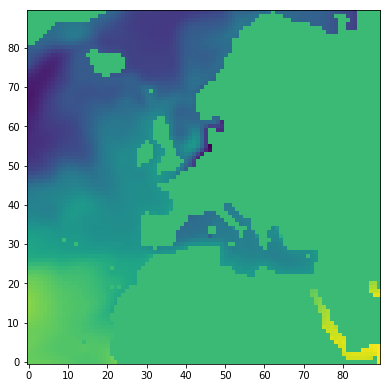

In [10]:
fig=plt.figure(figsize=(8, 6.5))

# plot SSH for time =0, tile = 2 by using ``imshow`` on the ``numpy array``
plt.imshow(ssh_arr[0,2,:,:], origin='lower')

We could accessing the array using the "dot" method on *ecco_ds* to first get *SSH* and then use the "dot" method to access the ``numpy`` array through *values*:

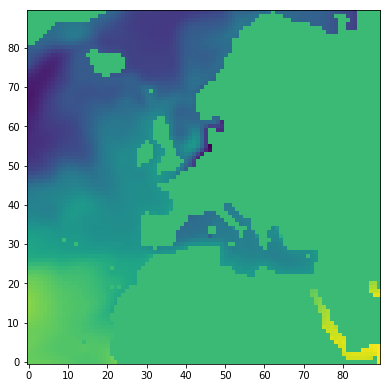

In [11]:
fig=plt.figure(figsize=(8, 6.5))
plt.imshow(ecco_ds.SSH.values[0,2,:,:], origin='lower')

Or could use the "dictionary" method on *ecco_ds* to get *SSH* then the "dot" method to access the ``numpy`` array through *values*:

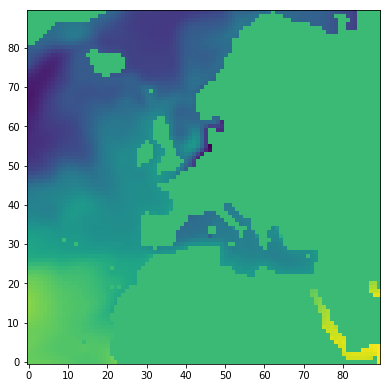

In [12]:
fig=plt.figure(figsize=(8, 6.5))
plt.imshow(ecco_ds['SSH'].values[0,2,:,:], origin='lower')

These are equivalent methods.

### Accessing Coordinates

Accessing Coordinates is exactly the same as accessing *Data variables*.  Use the "dot" or "dictionary" methods

In [13]:
xc = ecco_ds['XC']
time = ecco_ds['time']

print(type(xc))
print(type(time))

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


As *xc* is a ``DataArray``, we can access the values in its ``numpy`` array through ``.values``

In [14]:
xc

<xarray.DataArray 'XC' (tile: 13, j: 90, i: 90)>
dask.array<shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90)>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    YC       (tile, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    Depth    (tile, j, i) float32 ...
    rA       (tile, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
Attributes:
    units:          degrees_east
    long_name:      longitude at center of tracer cell
    standard_name:  longitude_at_c_location
    valid_range:    -180., 180.

The shape of the *xc* is 13 x 90 x 90.  Unlike *SSH* there is no time dimension.

In [16]:
xc.values.shape

(13, 90, 90)

### Accessing Attributes

To access *Attribute* fields you you can use the dot method directly on the ``Dataset`` or ``DataArray`` or the dictionary method on the ``attrs`` field. 

To demonstrate: we access the ``units`` attribute on *THETA* using both methods

In [17]:
ecco_ds.THETA.units

u'degC'

In [18]:
ecco_ds.THETA.attrs['units']

u'degC'

## Subsetting variables using the``[]``, ``sel``,  ``isel``, and ``where`` syntaxes

So far, a considerable amount of attention has been placed on the *Coordinates* of `Dataset` and `DataArray` objects.  Why?  Labeled coordinates are certainly not necessary for calculations on the basic numerical arrays that store the ECCO state estimate fields.  The reason so much attention has been placed on coordinates is because the `xarray` offers several very useful methods for selecting (or indexing) subsets of data.

For more details of these *indexing* methods, please see the excellent ``xarray`` documentation:
http://xarray.pydata.org/en/stable/indexing.html


### Subsetting `numpy` arrays using the **[ ]** syntax

Subsetting `numpy` arrays is simple with the standard Python **[ ]** syntax.  

To demonstrate, we'll pull out the ``numpy`` array of *SSH* and then select the first time record and second tile

  > **Note:** *Note `numpy` array indexing starts with 0*

In [15]:
ssh_arr = ecco_ds.SSH.values
type(ssh_arr)
ssh_arr.shape

(365, 13, 90, 90)

We know the order of the dimensions of SSH is [time, tile, j, i], so :

In [16]:
ssh_time_0_tile_2 = ssh_arr[0,2,:,:]

*ssh_time_0_tile_2* is also a numpy array, but now it is a 2D array:

In [17]:
ssh_time_0_tile_2.shape

(90, 90)

We know that the *time* coordinate on *ecco_ds* has one dimension, **time**, so we can use the ``[]`` syntax to find the first element of that array as well:

In [18]:
print(ecco_ds.time.dims)

# the first time record is 
print(ecco_ds.time.values[0])

(u'time',)
2010-01-01T12:00:00.000000000


which confirms that the first time record corresponds with Jan 1, 2010

Now that we have a 2D array in *ssh_time_0_tile_2*, let's plot it

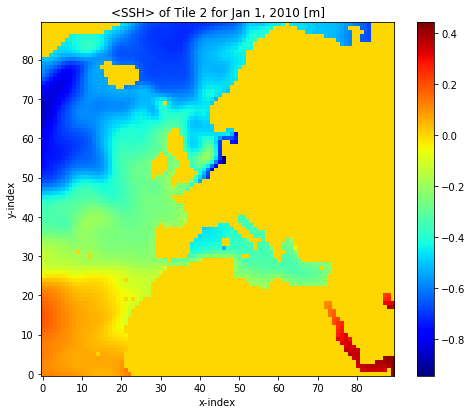

In [19]:
fig=plt.figure(figsize=(8, 6.5))
plt.imshow(ssh_time_0_tile_2, origin='lower',cmap='jet')
plt.colorbar()
plt.title('<SSH> of Tile 2 for Jan 1, 2010 [m]');
plt.xlabel('x-index');
plt.ylabel('y-index');

By eye we see large negative values around x=0, y=70 (i=0, j=70).  Let's confirm: 

In [20]:
# remember the order of the array is [tile, j, i]
ssh_time_0_tile_2[70,0]

-0.83787453

Let's plot *SSH* in this tile from y=0 to y=89 along x=0 (from the subtropical gyre into the subpolar gyre)

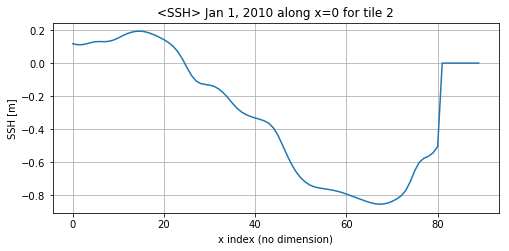

In [21]:
fig=plt.figure(figsize=(8, 3.5))

plt.plot(ssh_time_0_tile_2[:,0])
plt.title('<SSH> Jan 1, 2010 along x=0 for tile 2')
plt.ylabel('SSH [m]');plt.xlabel('x index (no dimension)');
plt.grid()

We see that around y=80, SSH=0 because from around y=80 on we are on Greenland.  

A more interesting plot might be to have the model latitude on the **x** axis instead of x-index:

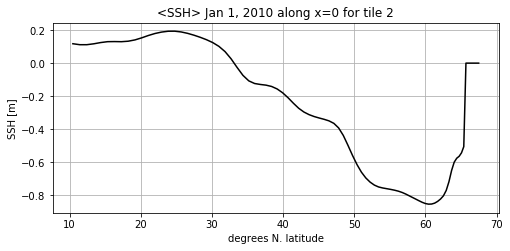

In [22]:
fig=plt.figure(figsize=(8, 3.5))

yc_tile_2 = ecco_ds.YC.values[2,:,:]

plt.plot(yc_tile_2[:,0],ssh_time_0_tile_2[:,0], color='k')
plt.title('<SSH> Jan 1, 2010 along x=0 for tile 2')
plt.ylabel('SSH [m]');plt.xlabel('degrees N. latitude');
plt.grid()

We can always use **[ ]** method to subset our `numpy` arrays.  It is a simple, direct method for accessing our fields.  Just for fun let's plot this SSH subset:

### Subsetting `DataArrays` using the **[ ]** syntax

An interesting and useful alternative to subsetting `numpy` arrays with the **[ ]** method is to subset `DataArray` instead:

In [23]:
ssh_time_0_tile_2_DA = ecco_ds.SSH[0,2,:,:]
ssh_time_0_tile_2_DA.load()

<xarray.DataArray 'SSH' (j: 90, i: 90)>
array([[0.117509, 0.118227, 0.118086, ..., 0.      , 0.      , 0.435055],
       [0.111616, 0.110071, 0.10781 , ..., 0.332288, 0.      , 0.426711],
       [0.11165 , 0.107326, 0.102354, ..., 0.365571, 0.376642, 0.431841],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    XC       (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC       (j, i) float32 10.458642 10.458642 10.458642 ... 67.53387 67.47211
    Depth    (j, i) float32 4658.681 4820.5703 5014.177 ... 0.0 0.0 0.0
    rA       (j, i) float32 11896091000.0 11896091000.0 .

The resulting `DataArray` is a subset of the original `DataArray`.  The subset has two fewer dimensions (**tile** and **time** have been eliminated). The horizontal dimensions **j** and **i** are unchanged.

Even though the **tile** and **time** dimensions have been eliminated, the dimensional and non-dimensional coordinates associated with **time** and **tile** remain.  In fact, these coordinates *tell us when in time and which tile our subset comes from*:

```
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    XC       (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC       (j, i) float32 10.458642 10.458642 10.458642 ... 67.53387 67.47211
    Depth    (j, i) float32 4658.681 4820.5703 5014.177 ... 0.0 0.0 0.0
    rA       (j, i) float32 11896091000.0 11896091000.0 ... 212633870.0
    iter     int32 157812
    time     datetime64[ns] 2010-01-01T12:00:00
```

Notice that the *tile* coordinate is 2 and the *time* coordinate is Jan 1, 2010.

As a `DataArray` we can take full advantage of the built-in plotting functionality of ``xarray``.  This functionality, which we've seen a few times, automatically labels the figure (although sometimes the labels can be a little odd).

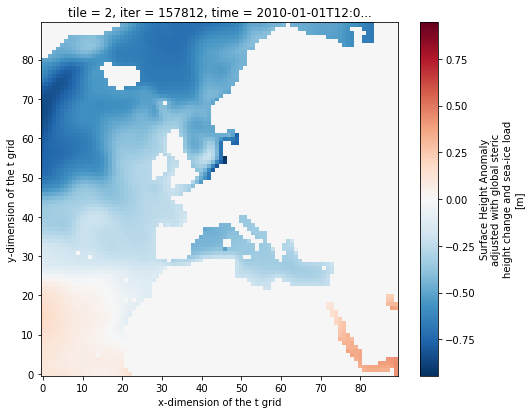

In [24]:
fig=plt.figure(figsize=(8, 6.5))
ssh_time_0_tile_2_DA.plot()

### Subsetting `DataArrays` using the **.sel( )** syntax

Another useful method for subsetting `DataArrays` is the **.sel( )** syntax.  The **.sel( )** syntax takes advantage of the fact that coordinates are **labels**.  We **sel**ect subsets of the `DataArray` by providing a subset of coordinate labels.

Let's select tile 2 and time (month) 1:

In [25]:
ssh_time_0_tile_2_sel = ecco_ds.SSH.sel(time='2010-01-01', tile=2)
ssh_time_0_tile_2_sel

<xarray.DataArray 'SSH' (time: 1, j: 90, i: 90)>
dask.array<shape=(1, 90, 90), dtype=float32, chunksize=(1, 90, 90)>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    XC       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    YC       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    Depth    (j, i) float32 ...
    rA       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    iter     (time) int32 dask.array<shape=(1,), chunksize=(1,)>
  * time     (time) datetime64[ns] 2010-01-01T12:00:00
Attributes:
    units:          m
    long_name:      Surface Height Anomaly adjusted with global steric height...
    standard_name:  sea_surface_height

The only difference here is that the resulting array has 'time' as a singleton dimension (dimension of length 1).  I don't know why.  Just use the ``squeeze`` command to squeeze it out.

In [26]:
ssh_time_0_tile_2_sel = ssh_time_0_tile_2_sel.squeeze()
ssh_time_0_tile_2_sel

<xarray.DataArray 'SSH' (j: 90, i: 90)>
dask.array<shape=(90, 90), dtype=float32, chunksize=(90, 90)>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    XC       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    YC       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    Depth    (j, i) float32 ...
    rA       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    iter     int32 dask.array<shape=(), chunksize=()>
    time     datetime64[ns] 2010-01-01T12:00:00
Attributes:
    units:          m
    long_name:      Surface Height Anomaly adjusted with global steric height...
    standard_name:  sea_surface_height

### Subsetting `DataArrays` using the **.isel( )** syntax

The last subsetting method is **.isel( )** syntax.  **.isel( )** uses the numerical **index** of coordinates instead of their label.  Subsets are extracted by providing a set of coordinate indices.

Because **sel()** uses the coordinate values as LABELS and **isel()** uses the index of the coordinates, they cannot  necessarily be used interchangably.  It is only because in ECCOv4 NetCDF files we gave the NAMES of some coordinates the same names as the INDICES of those coordinates that you can use:
* **sel(tile=2)** gives you the tile with the index NAME 2
* **isel(tile=2)** gives you the tile at index 2

Let's pull out a slice of *SSH* for tile at INDEX POSITION 2 and *time* at INDEX POSITION 0

In [27]:
ssh_time_0_tile_2_isel = ecco_ds.SSH.isel(tile=2, time=0)
ssh_time_0_tile_2_isel

<xarray.DataArray 'SSH' (j: 90, i: 90)>
dask.array<shape=(90, 90), dtype=float32, chunksize=(90, 90)>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    XC       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    YC       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    Depth    (j, i) float32 ...
    rA       (j, i) float32 dask.array<shape=(90, 90), chunksize=(90, 90)>
    iter     int32 dask.array<shape=(), chunksize=()>
    time     datetime64[ns] 2010-01-01T12:00:00
Attributes:
    units:          m
    long_name:      Surface Height Anomaly adjusted with global steric height...
    standard_name:  sea_surface_height

### More examples of subsetting using the **[ ]**, **.sel( )** and **.isel( )** syntaxes

In the examples above we only subsetted a single day (Jan 1, 2010) and a single tile (tile 2).  More complex subsetting is possible.  Here are some three examples that yield equivalent, more complex, subsets:

  > **Note:** Python array indexing goes up to but not including the final number in a range.  Because array indexing starts from 0, array index 41 corresponds to the 42nd element.

In [28]:
ssh_sub_bracket  = ecco_ds.SSH[68, 5, 31:41, 5:22]
ssh_sub_isel     = ecco_ds.SSH.isel(tile=5, time=68, i=range(5,22), j=range(31,41))
ssh_sub_sel      = ecco_ds.SSH.sel(tile=5, time='2010-03-10', i=range(5,22), j=range(31,41)).squeeze()

print ssh_sub_isel.shape
print ssh_sub_sel.shape

print('\nssh_sub_bracket')
print('--size %s ' % str(ssh_sub_bracket.shape))
print('--time %s ' % ssh_sub_bracket.time.values)
print('--tile %s ' % ssh_sub_bracket.tile.values)

print('\nssh_sub_isel')
print('--size %s ' % str(ssh_sub_isel.shape))
print('--time %s ' % ssh_sub_isel.time.values)
print('--tile %s ' % ssh_sub_isel.tile.values)


print('\nssh_sub_isel')
print('--size %s ' % str(ssh_sub_sel.shape))
print('--time %s ' % ssh_sub_sel.time.values)
print('--tile %s ' % ssh_sub_sel.tile.values)


(10, 17)
(10, 17)

ssh_sub_bracket
--size (10, 17) 
--time 2010-03-10T12:00:00.000000000 
--tile 5 

ssh_sub_isel
--size (10, 17) 
--time 2010-03-10T12:00:00.000000000 
--tile 5 

ssh_sub_isel
--size (10, 17) 
--time 2010-03-10T12:00:00.000000000 
--tile 5 


### Subsetting `Datasets` using the **.sel( )**, and **.isel( )** syntaxes

Amazingly, we can use the **.sel** and **.isel** methods to simultaneously subset multiple `DataArrays` stored within an single `Dataset`.  Let's make an interesting `Dataset` to subset and then test out the **.sel( )** and **.isel( )** subsetting methods.

Let's work on tile 1, time = 6 (Jan 7, 2010)

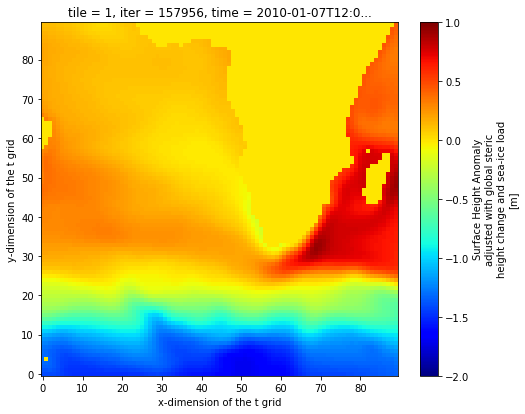

In [29]:
fig=plt.figure(figsize=(8, 6.5))

ecco_ds.SSH.isel(tile=1,time=6).plot(cmap='jet',vmin=-2, vmax=1)

Subset tile 1, j = 50 (a single row through the array), and time = 6 (Jan 7, 2010)

In [30]:
output_tile1_time06_j50= ecco_ds.isel(tile=1, time=6, j=50).load()
output_tile1_time06_j50.data_vars

Data variables:
    THETA    (i) float32 27.978748 28.422335 28.522259 ... 28.489069 28.42773
    SSH      (i) float32 0.32933694 0.36940202 0.3728275 ... 0.8602343 0.8996112
    SALT     (i) float32 36.965286 37.03966 37.11225 ... 35.02916 35.099796

All variables that had **tile, time**, or **j** coordinates have been subset while other variables are unchanged.  Let's plot the seafloor depth and sea surface height from west to east along j=50, (see plot at Line 16) which extends across the S. Atlantic, across Africa to Madagascar, and finally into to W. Indian Ocean.

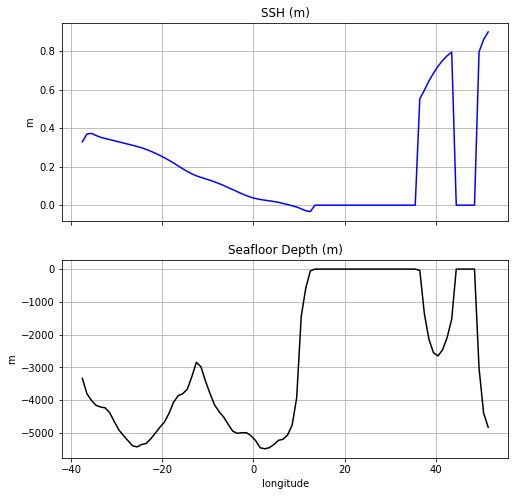

In [31]:
f, axarr = plt.subplots(2, sharex=True,figsize=(8, 8))
(ax1, ax2) = axarr
ax1.plot(output_tile1_time06_j50.XC, output_tile1_time06_j50.SSH,color='b')
ax1.set_ylabel('m')
ax1.set_title('SSH (m)')
ax1.grid()

ax2.plot(output_tile1_time06_j50.XC, -output_tile1_time06_j50.Depth,color='k')
ax2.set_xlabel('longitude')
ax2.set_ylabel('m')
ax2.set_title('Seafloor Depth (m)')
ax2.grid()

### Subsetting using the **where( )** syntax

The **where( )** method is quite different than other subsetting methods because  subsetting is done by masking out values with *nans* that do not meet some specified criteria.  

For more infomation about **where( )** see http://xarray.pydata.org/en/stable/indexing.html#masking-with-where

Let's demonstrate **where** by masking out all SSH values that do not fall within a box defined between 20S to 60N and 50W to 10E.

First, we'll extract the ``SSH`` `DataArray`

In [33]:
ssh_da=ecco_ds.SSH

Create a matrix that is `True` where latitude is between 20S and 60N and `False` otherwise.

In [34]:
lat_bounds = np.logical_and(ssh_da.YC  > -20, ssh_da.YC < 60)

Create a matrix that is `True` where longitude is between 50W and 10E and `False` otherwise.

In [35]:
lon_bounds = np.logical_and(ssh_da.XC  > -50, ssh_da.XC < 10)

Combine the ``lat_bounds`` and ``lon_bounds`` logical matrices:

In [36]:
lat_lon_bounds = np.logical_and(lat_bounds, lon_bounds)

Finally, use **where** to mask out all SSH values that do not fall within our  ``lat_lon_bounds``

In [37]:
ssh_da_subset_space = ssh_da.where(lat_lon_bounds, np.nan)

To visualize the SSH in our box we'll use one of our ECCO v4 custom plotting routines (which will be the subject of another tutorial).  

Notice the use of **.sel( )** to subset a single time slice (time=1) for plotting.

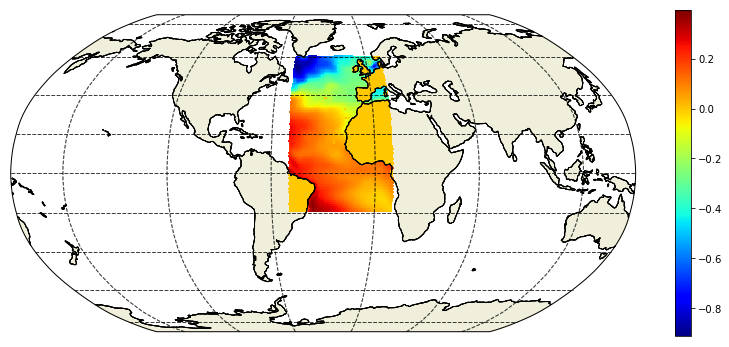

In [38]:
fig=plt.figure(figsize=(14, 6))

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, ecco_ds.YC, \
                              ssh_da_subset_space.isel(time=6),\
                              dx=.5, dy=.5,user_lon_0 = -30,\
                             show_colorbar=True);

## Conclusion

You now know several different methods for accessing and subsetting fields in `Dataset` and `DataArray` objects.    

To learn a more about indexing/subsetting methods please refer to the `xarray` manual for indexing methods, http://xarray.pydata.org/en/stable/indexing.html.  